In [171]:
# Importing the libraries 
import pandas as pd
pd.set_option("display.max_columns", 500)
import numpy as np

#importing libraries for visualization 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# importing library for scalling 
from sklearn.preprocessing import StandardScaler

# importing the library for PCA 
from sklearn.decomposition import PCA

#importing library to split the data 
from sklearn.model_selection import train_test_split, GridSearchCV, KFold

# importing iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import r2_score

# importing library for model preparation
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc # for deleting unused variables


# from google.colab import drive
# drive.mount('/content/drive')

# importing library for smoth to handle imbalancing 
from imblearn.over_sampling import SMOTE 

# Decision Tree With No PCA 
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz


import warnings
warnings.filterwarnings('ignore')


pd.options.display.max_columns = 150
pd.options.display.max_rows = 100

import os
import warnings
warnings.filterwarnings('ignore')

In [172]:
from google.colab import files
uploaded = files.upload()
import io
main_df = pd.read_csv(io.BytesIO(uploaded['telecom_churn_data.csv']))
main_df.head()

Saving telecom_churn_data.csv to telecom_churn_data (3).csv


mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [173]:
tc_df = main_df.copy()

In [174]:
tc_df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [175]:
# Missing Data Handle

In [176]:
dp_cols = ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9']
tc_df.drop(dp_cols, axis = 1, inplace = True)

In [177]:
(tc_df.isnull().sum()*100/len(tc_df)).sort_values(ascending = False).head(60)

arpu_3g_6                   74.846748
max_rech_data_6             74.846748
av_rech_amt_data_6          74.846748
night_pck_user_6            74.846748
count_rech_3g_6             74.846748
total_rech_data_6           74.846748
fb_user_6                   74.846748
arpu_2g_6                   74.846748
count_rech_2g_6             74.846748
date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
total_rech_data_7           74.428744
arpu_2g_7                   74.428744
arpu_3g_7                   74.428744
max_rech_data_7             74.428744
night_pck_user_7            74.428744
count_rech_2g_7             74.428744
fb_user_7                   74.428744
av_rech_amt_data_7          74.428744
count_rech_3g_7             74.428744
max_rech_data_9             74.077741
arpu_3g_9                   74.077741
count_rech_2g_9             74.077741
av_rech_amt_data_9          74.077741
arpu_2g_9                   74.077741
count_rech_3g_9             74.077741
night_pck_us

In [178]:
sixth_cols = [col for col in tc_df.columns if '_6' in col]
# tc_df[sixth_cols].head(20)
(tc_df[sixth_cols].isnull().sum()*100/len(tc_df[sixth_cols])).sort_values(ascending = False).head(20)

fb_user_6                   74.846748
arpu_3g_6                   74.846748
total_rech_data_6           74.846748
max_rech_data_6             74.846748
count_rech_2g_6             74.846748
count_rech_3g_6             74.846748
av_rech_amt_data_6          74.846748
date_of_last_rech_data_6    74.846748
arpu_2g_6                   74.846748
night_pck_user_6            74.846748
roam_og_mou_6                3.937039
std_og_t2t_mou_6             3.937039
loc_ic_t2t_mou_6             3.937039
og_others_6                  3.937039
spl_og_mou_6                 3.937039
isd_og_mou_6                 3.937039
std_og_mou_6                 3.937039
std_og_t2c_mou_6             3.937039
std_og_t2f_mou_6             3.937039
std_og_t2m_mou_6             3.937039
dtype: float64

In [179]:
seventh_cols = [col for col in tc_df.columns if '_7' in col]
# tc_df[sixth_cols].head(20)
(tc_df[seventh_cols].isnull().sum()*100/len(tc_df[seventh_cols])).sort_values(ascending = False).head(20)

fb_user_7                   74.428744
arpu_3g_7                   74.428744
total_rech_data_7           74.428744
max_rech_data_7             74.428744
count_rech_2g_7             74.428744
count_rech_3g_7             74.428744
av_rech_amt_data_7          74.428744
date_of_last_rech_data_7    74.428744
arpu_2g_7                   74.428744
night_pck_user_7            74.428744
roam_og_mou_7                3.859039
std_og_t2t_mou_7             3.859039
loc_ic_t2t_mou_7             3.859039
og_others_7                  3.859039
spl_og_mou_7                 3.859039
isd_og_mou_7                 3.859039
std_og_mou_7                 3.859039
std_og_t2c_mou_7             3.859039
std_og_t2f_mou_7             3.859039
std_og_t2m_mou_7             3.859039
dtype: float64

In [180]:
eighth_cols = [col for col in tc_df.columns if '_8' in col]
# tc_df[sixth_cols].head(20)
(tc_df[eighth_cols].isnull().sum()*100/len(tc_df[eighth_cols])).sort_values(ascending = False).head(20)

fb_user_8                   73.660737
arpu_3g_8                   73.660737
total_rech_data_8           73.660737
max_rech_data_8             73.660737
count_rech_2g_8             73.660737
count_rech_3g_8             73.660737
av_rech_amt_data_8          73.660737
date_of_last_rech_data_8    73.660737
arpu_2g_8                   73.660737
night_pck_user_8            73.660737
roam_og_mou_8                5.378054
std_og_t2t_mou_8             5.378054
loc_ic_t2t_mou_8             5.378054
og_others_8                  5.378054
spl_og_mou_8                 5.378054
isd_og_mou_8                 5.378054
std_og_mou_8                 5.378054
std_og_t2c_mou_8             5.378054
std_og_t2f_mou_8             5.378054
std_og_t2m_mou_8             5.378054
dtype: float64

In [181]:
ninth_cols = [col for col in tc_df.columns if '_9' in col]
# tc_df[sixth_cols].head(20)
(tc_df[ninth_cols].isnull().sum()*100/len(tc_df[ninth_cols])).sort_values(ascending = False).head(20)

fb_user_9                   74.077741
arpu_3g_9                   74.077741
total_rech_data_9           74.077741
max_rech_data_9             74.077741
count_rech_2g_9             74.077741
count_rech_3g_9             74.077741
av_rech_amt_data_9          74.077741
date_of_last_rech_data_9    74.077741
arpu_2g_9                   74.077741
night_pck_user_9            74.077741
roam_og_mou_9                7.745077
std_og_t2t_mou_9             7.745077
loc_ic_t2t_mou_9             7.745077
og_others_9                  7.745077
spl_og_mou_9                 7.745077
isd_og_mou_9                 7.745077
std_og_mou_9                 7.745077
std_og_t2c_mou_9             7.745077
std_og_t2f_mou_9             7.745077
std_og_t2m_mou_9             7.745077
dtype: float64

In [182]:
rmv_cols = ['count_rech_2g_6', 'count_rech_2g_7','count_rech_2g_8','count_rech_2g_9','count_rech_3g_6',
 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
 'arpu_3g_6', 'arpu_3g_7','arpu_3g_8', 'arpu_3g_9','arpu_2g_6', 'arpu_2g_7','arpu_2g_8', 'arpu_2g_9','night_pck_user_6',
 'night_pck_user_7', 'night_pck_user_8',
 'night_pck_user_9', 'fb_user_6',
 'fb_user_7', 'fb_user_8','fb_user_9']

tc_df.drop(rmv_cols, axis= 1, inplace = True)

In [183]:
impute_cols=['total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

for i in impute_cols: 
  tc_df[i].fillna(0.00 ,inplace=True)

In [184]:
tc_df[impute_cols].head()

total_rech_data_6  total_rech_data_7  total_rech_data_8  total_rech_data_9  \
0                1.0                1.0                1.0                0.0   
1                0.0                1.0                2.0                0.0   
2                0.0                0.0                0.0                1.0   
3                0.0                0.0                0.0                0.0   
4                1.0                0.0                0.0                0.0   

   max_rech_data_6  max_rech_data_7  max_rech_data_8  max_rech_data_9  \
0            252.0            252.0            252.0              0.0   
1              0.0            154.0             25.0              0.0   
2              0.0              0.0              0.0             46.0   
3              0.0              0.0              0.0              0.0   
4             56.0              0.0              0.0              0.0   

   av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  \
0               252.0               252.0               252.0   
1                 0.0               154.0                50.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                56.0                 0.0                 0.0   

   av_rech_amt_data_9  
0                 0.0  
1                 0.0  
2                46.0  
3                 0.0  
4                 0.0

In [185]:
# Converting last day columns to bolean recharge or not

def catg(x):
    if pd.isnull(x):
        return 0
    else: 
        return 1
tc_df["last_rech_data_6"]=tc_df["date_of_last_rech_data_6"].apply(catg)
tc_df["last_rech_data_7"]=tc_df["date_of_last_rech_data_7"].apply(catg)
tc_df["last_rech_data_8"]=tc_df["date_of_last_rech_data_8"].apply(catg)
tc_df["last_rech_data_9"]=tc_df["date_of_last_rech_data_9"].apply(catg)

In [186]:
tc_df[['date_of_last_rech_data_6','last_rech_data_6']].head()

date_of_last_rech_data_6  last_rech_data_6
0                6/21/2014                 1
1                      NaN                 0
2                      NaN                 0
3                      NaN                 0
4                 6/4/2014                 1

In [187]:
cols = ["date_of_last_rech_data_6", "date_of_last_rech_data_7", "date_of_last_rech_data_8", "date_of_last_rech_data_9"]
tc_df.drop(cols, axis = 1, inplace = True)

In [188]:
(tc_df.isnull().sum()/ len(tc_df)*100).head(20)

mobile_number     0.000000
circle_id         0.000000
loc_og_t2o_mou    1.018010
std_og_t2o_mou    1.018010
loc_ic_t2o_mou    1.018010
arpu_6            0.000000
arpu_7            0.000000
arpu_8            0.000000
arpu_9            0.000000
onnet_mou_6       3.937039
onnet_mou_7       3.859039
onnet_mou_8       5.378054
onnet_mou_9       7.745077
offnet_mou_6      3.937039
offnet_mou_7      3.859039
offnet_mou_8      5.378054
offnet_mou_9      7.745077
roam_ic_mou_6     3.937039
roam_ic_mou_7     3.859039
roam_ic_mou_8     5.378054
dtype: float64

In [189]:
cols = tc_df.columns[100*tc_df.isnull().sum()/len(tc_df.index)>0]

In [190]:
cols

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8',
       ...
       'isd_ic_mou_8', 'isd_ic_mou_9', 'ic_others_6', 'ic_others_7',
       'ic_others_8', 'ic_others_9', 'date_of_last_rech_6',
       'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9'],
      dtype='object', length=123)

In [191]:
tc_df[cols].describe()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   onnet_mou_6  \
count         98981.0         98981.0         98981.0  96062.000000   
mean              0.0             0.0             0.0    132.395875   
std               0.0             0.0             0.0    297.207406   
min               0.0             0.0             0.0      0.000000   
25%               0.0             0.0             0.0      7.380000   
50%               0.0             0.0             0.0     34.310000   
75%               0.0             0.0             0.0    118.740000   
max               0.0             0.0             0.0   7376.710000   

        onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  offnet_mou_7  \
count  96140.000000  94621.000000  92254.000000  96062.000000  96140.000000   
mean     133.670805    133.018098    130.302327    197.935577    197.045133   
std      308.794148    308.951589    308.477668    316.851613    325.862803   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.660000      6.460000      5.330000     34.730000     32.190000   
50%       32.330000     32.360000     29.840000     96.310000     91.735000   
75%      115.595000    115.860000    112.130000    231.860000    226.815000   
max     8157.780000  10752.560000  10427.460000   8362.360000   9667.130000   

       offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  94621.000000  92254.000000   96062.000000   96140.000000   
mean     196.574803    190.337222       9.950013       7.149898   
std      327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000       0.000000       0.000000   
25%       31.630000     27.130000       0.000000       0.000000   
50%       92.140000     87.290000       0.000000       0.000000   
75%      228.260000    220.505000       0.000000       0.000000   
max    14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      5337.040000    4428.460000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count      94621.000000      92254.000000      96062.000000      96140.000000   
mean          45.887806         44.584446         93.342088         91.397131   
std          151.184830        147.995390        162.780544        157.492308   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.600000          1.360000          9.880000         10.025000   
50%           11.730000         11.260000         41.030000         40.430000   
75%           40.110000         39.280000        110.390000        107.560000   
max        10752.560000      10389.240000       4729.740000       4557.140000   

       loc_og_t2m_mou_8

In [192]:
tc_df.shape

(99999, 198)

In [193]:
# Removing columns which have all zero Values 
tc_df = tc_df.loc[:, tc_df.any()]
tc_df.shape

(99999, 187)

In [194]:
cols = tc_df.columns[100*tc_df.isnull().sum()/len(tc_df.index)>0]
tc_df[cols].describe()

onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      5337.040000    4428.460000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count      94621.000000      92254.000000      96062.000000      96140.000000   
mean          45.887806         44.584446         93.342088         91.397131   
std          151.184830        147.995390        162.780544        157.492308   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.600000          1.360000          9.880000         10.025000   
50%           11.730000         11.260000         41.030000         40.430000   
75%           40.110000         39.280000        110.390000        107.560000   
max        10752.560000      10389.240000       4729.740000       4557.140000   

       loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
count      94621.000000      92254.000000      96062.000000      96140.000000   
mean          91.755128         90.463192          3.751013          3.792985   
std          156.537048        158.681454         14.230438         14.264986   
min            0.000000          0.000000          0.000000          0.000000   
25%            9.810000          8.810000          0.000000          0.000000   
50%           40.360000         39.120000          0

In [195]:
ninth_cols = [col for col in tc_df.columns if '_9' in col]
ninth_df=tc_df[ninth_cols]
ninth_df = ninth_df.reindex(sorted(ninth_df.columns), axis=1)
ninth_df[ninth_df.isnull().any(axis=1)].head(20)

arpu_9  av_rech_amt_data_9 date_of_last_rech_9  ic_others_9  \
0     21.10                 0.0           9/28/2014          NaN   
7    500.00                 0.0           9/30/2014          NaN   
11     0.00                 0.0                 NaN          0.0   
29     0.10                 0.0            9/6/2014          NaN   
32     0.00                 0.0           9/28/2014          NaN   
35     0.00                 0.0           9/26/2014          NaN   
45     0.00                 0.0           9/25/2014          NaN   
51   128.50                 0.0                 NaN          0.0   
67     0.00                 0.0                 NaN          NaN   
72    89.19                 0.0                 NaN          0.0   
83     0.00                 0.0           9/29/2014          NaN   
86     0.00                 0.0           9/29/2014          NaN   
97     0.00                 0.0           9/21/2014          NaN   
111    0.00                 0.0           9/21/2014          NaN   
129    0.00                 0.0           9/30/2014          NaN   
143    0.00                 0.0           9/29/2014          NaN   
144    0.00                 0.0                 NaN          NaN   
161    0.00                 0.0                 NaN          NaN   
179    0.54                 0.0           9/30/2014          NaN   
188    0.00                 0.0                 NaN          NaN   

     isd_ic_mou_9  isd_og_mou_9  last_day_rch_amt_9  last_rech_data_9  \
0             NaN           NaN                   0                 0   
7             NaN           NaN                   0                 0   
11            0.0           0.0                   0                 0   
29            NaN           NaN                   0                 0   
32            NaN           NaN                   0                 0   
35            NaN           NaN                   0                 0   
45            NaN           NaN                   0                 0   
51            0.0           0.0                   0                 0   
67            NaN           NaN                   0                 0   
72            0.0           0.0                   0                 0   
83            NaN           NaN                   0                 0   
86            NaN           NaN                   0                 0   
97            NaN           NaN                   0                 0   
111           NaN           NaN                   0                 0   
129           NaN           NaN                   0                 0   
143           NaN           NaN                   0                 0   
144           NaN           NaN                   0                 0   
161           NaN           NaN                   0                 0   
179           NaN           NaN                   0                 0   
188           NaN           NaN                   0                 0   

     loc_ic_mou_9  loc_ic_t2f_mou_9  loc_ic_t2m_mou_9  loc_ic_t2t_mou_9  \
0             NaN               NaN               NaN               NaN   
7             NaN               NaN               NaN               NaN   
11         108.84              0.61             83.96             24.26   
29            NaN               NaN               NaN               NaN   
32            NaN               NaN               NaN               NaN   
35            NaN               NaN               NaN               NaN   
45            NaN               NaN               NaN               NaN   
51           6.30              4.08              2.21              0.00   
67            NaN               NaN               NaN               NaN   
72         192.39              5.16            175.44             11.78   
83            NaN               NaN               NaN               NaN   
86            NaN               NaN               NaN               NaN   
97            NaN               NaN               NaN              

In [196]:
ninth_df[ninth_df.isnull().any(axis=1)].shape

(9618, 45)

In [197]:
ninth_df[~ninth_df.isnull().any(axis=1)].head(10)

arpu_9  av_rech_amt_data_9 date_of_last_rech_9  ic_others_9  \
1    86.285                 0.0           9/30/2014         0.00   
2   290.714                46.0           9/29/2014         0.36   
3   389.500                 0.0           9/30/2014         0.80   
4   163.426                 0.0           9/28/2014         0.00   
5   170.826                 0.0           9/28/2014         0.43   
6   114.751                 0.0           9/28/2014         0.00   
8   166.787                 0.0           9/30/2014         0.00   
9   160.042                 0.0           9/20/2014         0.00   
10   82.638                17.0            9/6/2014         0.00   
12   39.660                 0.0           9/21/2014         0.00   

    isd_ic_mou_9  isd_og_mou_9  last_day_rch_amt_9  last_rech_data_9  \
1           0.00           0.0                   0                 0   
2           0.01           0.0                   0                 1   
3           0.00           0.0                  30                 0   
4           0.00           0.0                  50                 0   
5           0.00           0.0                   0                 0   
6           0.00           0.0                  24                 0   
8           0.00           0.0                   0                 0   
9          28.13           0.0                  50                 0   
10          0.00           0.0                  30                 1   
12          0.06           0.0                 130                 0   

    loc_ic_mou_9  loc_ic_t2f_mou_9  loc_ic_t2m_mou_9  loc_ic_t2t_mou_9  \
1         173.03              0.00             56.93            116.09   
2         345.41            158.19             38.98            148.23   
3         160.19             65.59             52.86             41.73   
4         202.81              0.00             48.24            154.56   
5         152.39              0.00             84.01             68.38   
6        2572.49              6.19            231.41           2334.88   
8          21.38              0.00             17.34              4.03   
9         378.93              0.48             65.06            313.38   
10          1.83              0.00              1.83              0.00   
12         69.81              9.48             49.14             11.18   

    loc_og_mou_9  loc_og_t2c_mou_9  loc_og_t2f_mou_9  loc_og_t2m_mou_9  \
1          72.11              0.00              0.00             53.76   
2          64.81              0.48             22.24             28.16   
3          83.03              0.00              2.06             65.46   
4          98.61              0.00              1.93             37.89   
5         185.71              0.00              2.13             44.78   
6          65.56              0.00              0.00             50.33   
8          60.71              0.00              0.00             34.58   
9          65.11              0.00              0.00             37.26   
10          0.31              0.00              0.00              0.31   
12         65.03              0.00              2.18             58.26   

    loc_og_t2t_mou_9  max_rech_amt_9  max_rech_data_9  monthly_2g_9  \
1              18.34              50              0.0             0   
2              14.39             100             46.0             0   
3              15.49              50              0.0             0   
4              58.78              50              0.0             0   
5             138.79             130              0.0             0   
6              15.23              30              0.0             0   
8              26.13              36              0.0             0   
9              27.84             130              0.0             0   
10              0.00              30             17.0             0   
12              4.58             130              0.0             0   

    monthly_3g_9  offnet_mou_9  og_others_9  onnet_

In [198]:
round((ninth_df.isnull().sum()/len(ninth_df) * 100),2).sort_values(ascending=False).head(30)

og_others_9            7.75
loc_og_t2c_mou_9       7.75
loc_og_t2m_mou_9       7.75
loc_og_t2t_mou_9       7.75
loc_og_mou_9           7.75
loc_ic_t2t_mou_9       7.75
loc_ic_t2m_mou_9       7.75
loc_ic_t2f_mou_9       7.75
offnet_mou_9           7.75
loc_ic_mou_9           7.75
onnet_mou_9            7.75
roam_ic_mou_9          7.75
roam_og_mou_9          7.75
spl_ic_mou_9           7.75
spl_og_mou_9           7.75
std_ic_mou_9           7.75
std_ic_t2f_mou_9       7.75
std_ic_t2m_mou_9       7.75
std_ic_t2t_mou_9       7.75
std_og_mou_9           7.75
std_og_t2f_mou_9       7.75
std_og_t2m_mou_9       7.75
std_og_t2t_mou_9       7.75
isd_og_mou_9           7.75
isd_ic_mou_9           7.75
ic_others_9            7.75
loc_og_t2f_mou_9       7.75
date_of_last_rech_9    4.76
last_day_rch_amt_9     0.00
last_rech_data_9       0.00
dtype: float64

In [199]:
cols = tc_df.columns[100 * tc_df.isnull().sum()/len(tc_df.index)>0]
cols 

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9',
       'roam_ic_mou_6', 'roam_ic_mou_7',
       ...
       'isd_ic_mou_8', 'isd_ic_mou_9', 'ic_others_6', 'ic_others_7',
       'ic_others_8', 'ic_others_9', 'date_of_last_rech_6',
       'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9'],
      dtype='object', length=112)

In [200]:
for c in cols:
    a=c[-1]
    b='date_of_last_rech_'+str(a)
    tc_df[c]= np.where(tc_df[b].isnull(), 0 , tc_df[c])

In [201]:
  ## Creating new feature from the data column
## if last date is there then 1 else 0 
object_col_data = tc_df.select_dtypes(include=['object'])
for col in object_col_data.columns:
    tc_df[col]= pd.to_datetime(tc_df[col])

tc_df["last_rech_6"]=tc_df["date_of_last_rech_6"].apply(catg)
tc_df["last_rech_7"]=tc_df["date_of_last_rech_7"].apply(catg)
tc_df["last_rech_8"]=tc_df["date_of_last_rech_8"].apply(catg)
tc_df["last_rech_9"]=tc_df["date_of_last_rech_9"].apply(catg)

In [202]:
# Dropping the old features 
tc_df.drop(["date_of_last_rech_6","date_of_last_rech_7", "date_of_last_rech_8","date_of_last_rech_9"],axis=1,inplace=True)

In [203]:
low_missing_cols = tc_df.columns[100*tc_df.isnull().sum()/len(tc_df.index)>0]
low_missing_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9',
       'roam_ic_mou_6', 'roam_ic_mou_7',
       ...
       'spl_ic_mou_8', 'spl_ic_mou_9', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8', 'isd_ic_mou_9', 'ic_others_6', 'ic_others_7',
       'ic_others_8', 'ic_others_9'],
      dtype='object', length=108)

In [204]:
round((tc_df.isnull().sum()/len(tc_df) * 100),2).sort_values(ascending=False).head(20) 

std_ic_t2t_mou_9    4.86
ic_others_9         4.86
std_ic_mou_9        4.86
spl_og_mou_9        4.86
loc_og_t2t_mou_9    4.86
spl_ic_mou_9        4.86
isd_ic_mou_9        4.86
loc_og_t2m_mou_9    4.86
isd_og_mou_9        4.86
roam_ic_mou_9       4.86
loc_og_t2f_mou_9    4.86
std_og_mou_9        4.86
std_og_t2f_mou_9    4.86
loc_og_t2c_mou_9    4.86
std_og_t2m_mou_9    4.86
loc_og_mou_9        4.86
std_ic_t2f_mou_9    4.86
roam_og_mou_9       4.86
std_og_t2t_mou_9    4.86
loc_ic_t2f_mou_9    4.86
dtype: float64

In [205]:
for col in low_missing_cols:
     tc_df[col].fillna(tc_df[col].median(),inplace=True)

In [206]:
round((tc_df.isnull().sum()/len(tc_df) * 100),2).sort_values(ascending=False).head(0)

Series([], dtype: float64)

In [207]:
# finding average
tc_df["total_data_avg(6,7)"] = (tc_df["av_rech_amt_data_6"]+ tc_df["av_rech_amt_data_7"]+ tc_df["total_rech_amt_6"] + tc_df["total_rech_amt_7"])/2

In [208]:
percentile_70_6n7 = np.percentile(tc_df["total_data_avg(6,7)"], 70.0)

In [209]:
hv_cust = tc_df[tc_df["total_data_avg(6,7)"] >=percentile_70_6n7] 
hv_cust.shape 

(30015, 188)

In [210]:
hv_cust["churn"] = np.where(hv_cust[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1,0)
hv_cust.head()

mobile_number  circle_id    arpu_6    arpu_7    arpu_8   arpu_9  \
0      7000842753        109   197.385   214.816   213.803   21.100   
7      7000701601        109  1069.180  1349.850  3171.480  500.000   
8      7001524846        109   378.721   492.223   137.362  166.787   
16     7000875565        109   430.975   299.869   187.894  206.490   
21     7002124215        109   514.453   597.753   637.760  578.596   

    onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  \
0         33.39        31.24         0.00        26.94         94.48   
7         57.84        54.68        52.29        26.94        453.43   
8        413.69       351.03        35.08        33.46         94.66   
16        50.51        74.01        70.61        31.34        296.29   
21       102.41       132.11        85.14       161.63        757.93   

    offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
0          89.51          0.00         81.31           0.00           0.00   
7         567.16        325.91         81.31          16.23          33.49   
8          80.63        136.48        108.71           0.00           0.00   
16        229.74        162.76        224.39           0.00           2.83   
21        896.68        983.39        869.89           0.00           0.00   

    roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00            0.0           0.00           0.00           0.00   
7           31.64            0.0          23.74          12.59          38.06   
8            0.00            0.0           0.00           0.00           0.00   
16           0.00            0.0           0.00          17.74           0.00   
21           0.00            0.0           0.00           0.00           0.00   

    roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0             0.0             11.53             11.14              0.00   
7             0.0             51.39             31.38             40.28   
8             0.0            297.13            217.59             12.49   
16            0.0             42.61             65.16             67.38   
21            0.0              4.48              6.16             23.34   

    loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0              10.03             40.14             39.29              0.00   
7              10.03            308.63            447.38            162.28   
8              26.13             80.96             70.58             50.54   
16             26.88            273.29            145.99            128.28   
21             29.98             91.81             87.93            104.81   

    loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              35.83              0.00              0.00              0.00   
7              35.83             62.13             55.14             53.23   
8              34.58              0.00              0.00              0.00   
16            201.49              0.00              4.48             10.26   
21            107.54              0.75              0.00              1.58   

    loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               0.0               0.0              0.00   
7               0.00               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
16              4.66               0.0               0.0              0.00   
21              0.00               0.0               0.0              0.00   

    loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  \
0                0.0         63.65         61.93          0.00         56.86   
7                0.0        422.16        533.91        255.79         56.86   
8                0.0        378.09        288.18         63.04         60.71   
16        

In [211]:
hv_cust["churn"].value_counts()/len(hv_cust)*100

0    91.804098
1     8.195902
Name: churn, dtype: float64

In [212]:
# We don't need 9th month columns 
ninth_cols = [col for col in hv_cust.columns if '_9' in col]
hv_cust.drop(ninth_cols, axis = 1, inplace = True)
hv_cust.shape

(30015, 144)

In [213]:
hv_cust["Total_Usage_6"] = hv_cust['vol_2g_mb_8']+hv_cust['vol_3g_mb_6']+hv_cust['total_og_mou_6']+hv_cust['total_ic_mou_6']
hv_cust["Total_Usage_7"] = hv_cust['vol_2g_mb_7']+hv_cust['vol_3g_mb_7']+hv_cust['total_og_mou_7']+hv_cust['total_ic_mou_7']
hv_cust["Total_Usage_8"] = hv_cust['vol_2g_mb_8']+hv_cust['vol_3g_mb_8']+hv_cust['total_og_mou_8']+hv_cust['total_ic_mou_8']

In [214]:
drp_cols=['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8',
'vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8',
'total_og_mou_6','total_og_mou_7','total_og_mou_8',
'total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']
hv_cust.drop(drp_cols,axis=1 ,inplace=True)

In [215]:
hv_cust.shape

(30015, 135)

In [216]:
# Converet AON column to month format

hv_cust["aon"] = round(hv_cust["aon"]/30,2)
hv_cust["aon"]

0        32.27
7        26.73
8        10.50
16       17.03
21       24.00
         ...  
99984    27.33
99986    89.87
99988    10.93
99997    15.93
99998    25.03
Name: aon, Length: 30015, dtype: float64

In [217]:
ranges = [0,6,12,24,48,96]

labels = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-4 Yrs', '4 yrs and above']

hv_cust['tenure_ranges'] = pd.cut(hv_cust['aon'], ranges, labels = labels)
hv_cust['tenure_ranges'].head()

0         2-4 Yrs
7         2-4 Yrs
8     6-12 Months
16        1-2 Yrs
21        1-2 Yrs
Name: tenure_ranges, dtype: category
Categories (5, object): [0-6 Months < 6-12 Months < 1-2 Yrs < 2-4 Yrs < 4 yrs and above]

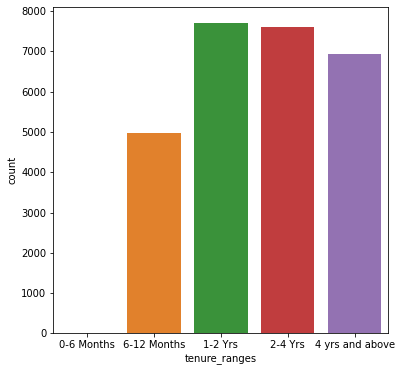

In [218]:
plt.figure(figsize = (6,6))
sns.countplot(hv_cust["tenure_ranges"])
plt.show()

In [219]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

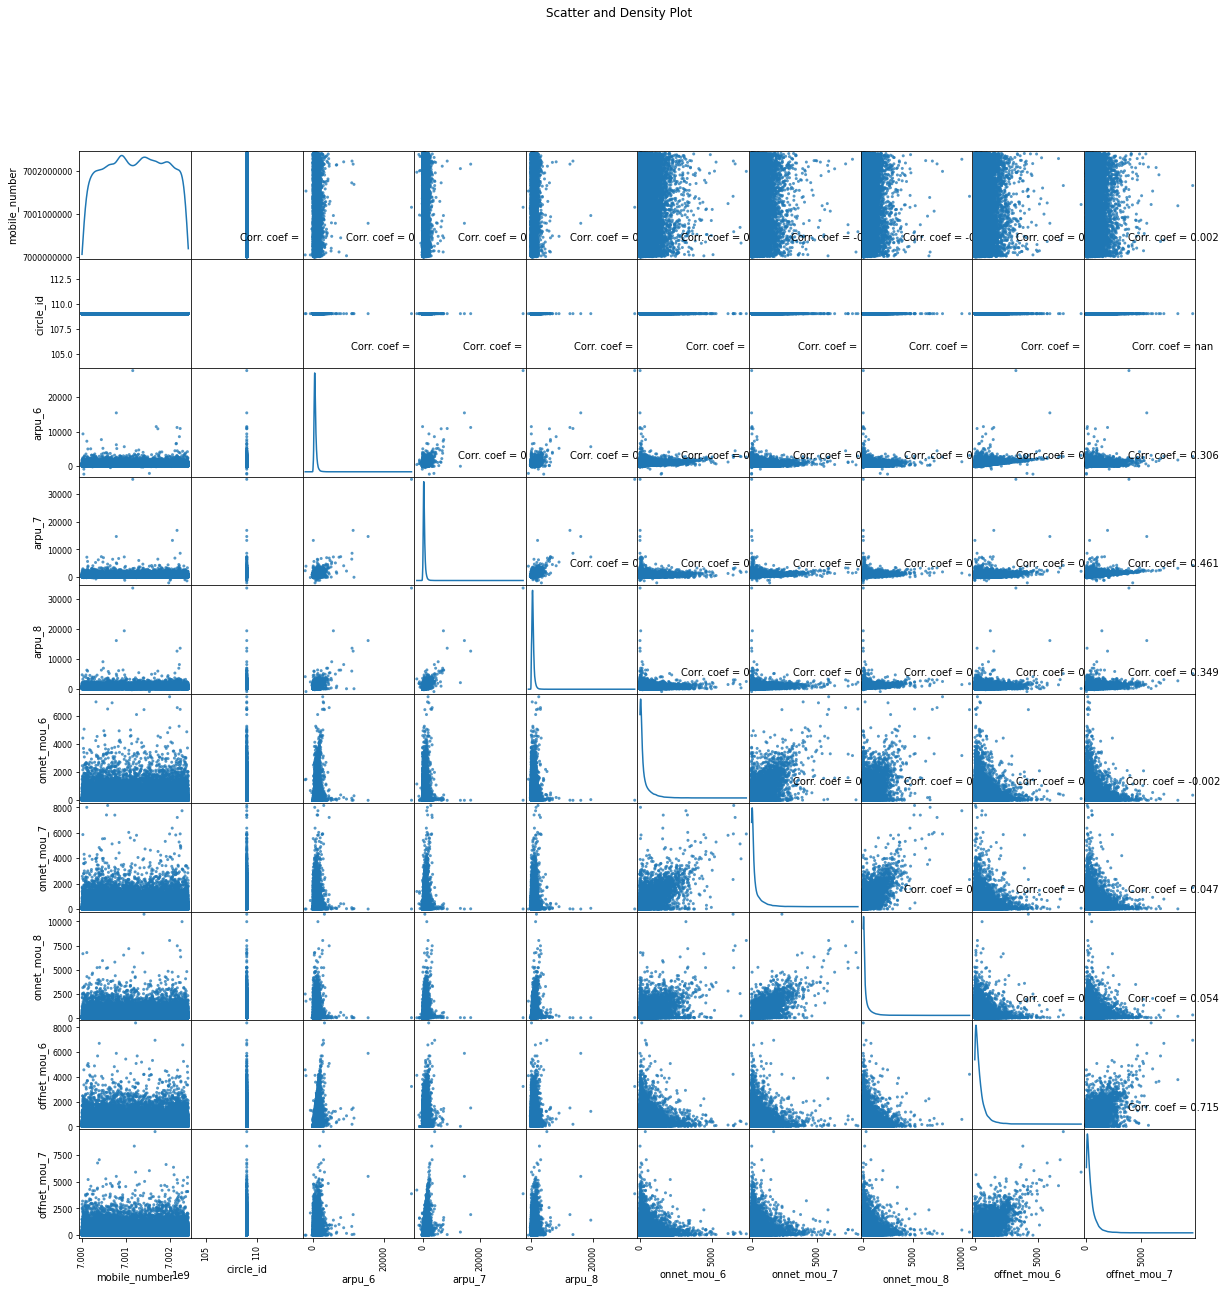

In [220]:
plotScatterMatrix(hv_cust, 20, 10)

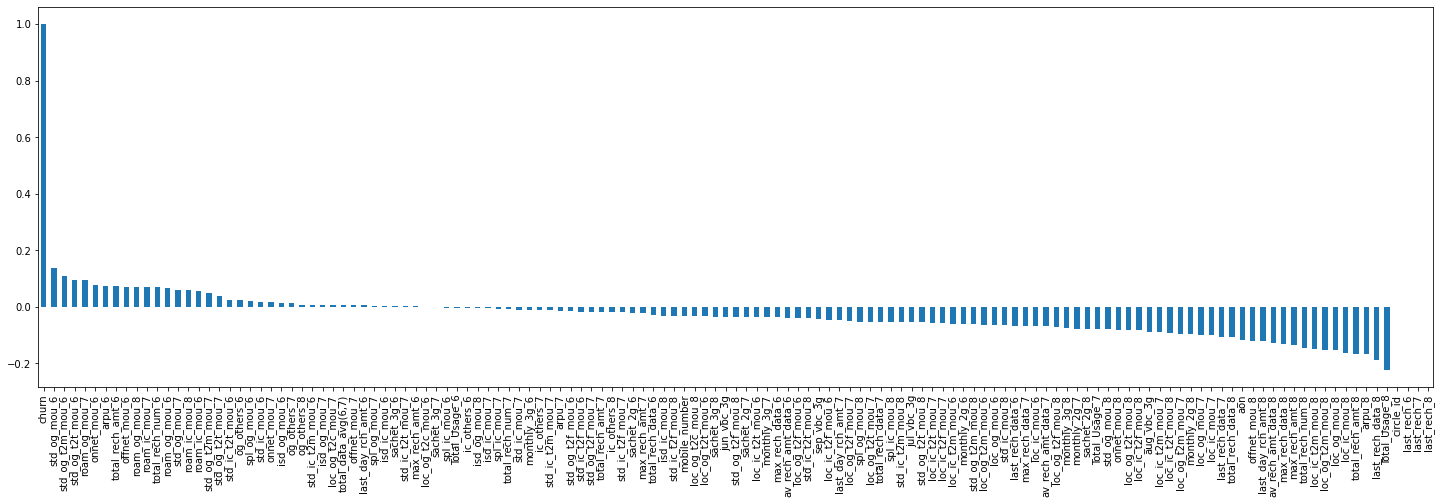

In [221]:
plt.figure(figsize = (25,7))
hv_cust.corr()["churn"].sort_values(ascending = False).plot(kind = "bar")
plt.show()

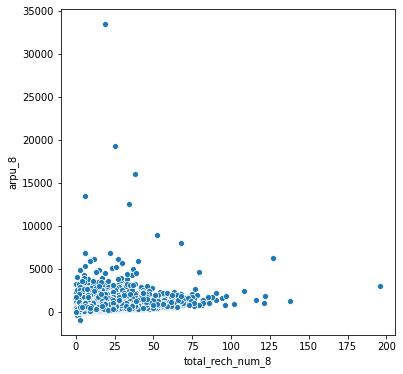

In [222]:
plt.figure(figsize = (6,6))
sns.scatterplot(x = "total_rech_num_8", y = "arpu_8", data= hv_cust)
plt.show()

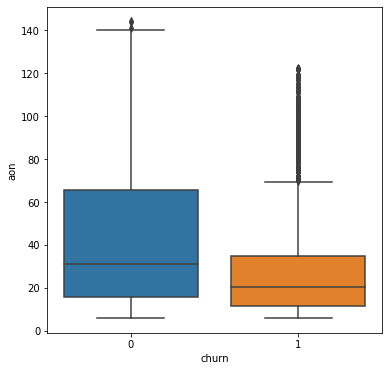

In [223]:
plt.figure(figsize = (6,6))
sns.boxplot(x = "churn", y = "aon", data = hv_cust)
plt.show()

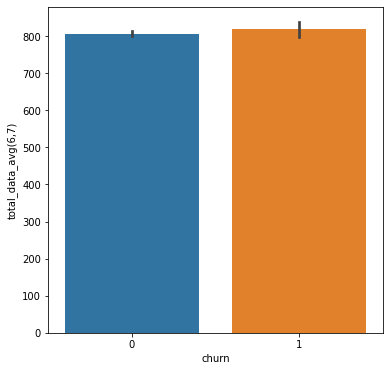

In [224]:
plt.figure(figsize = (6,6))
sns.barplot(x = "churn", y = "total_data_avg(6,7)", data = hv_cust)
plt.show()

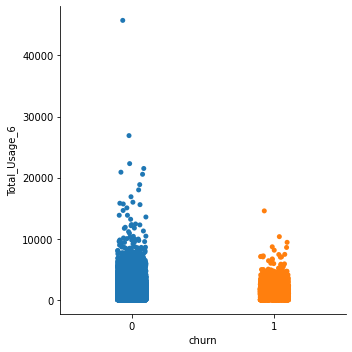

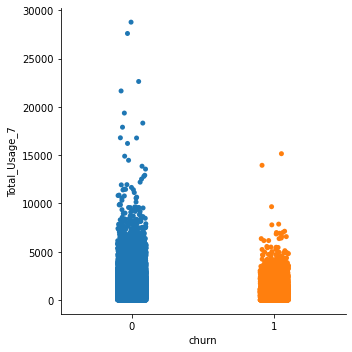

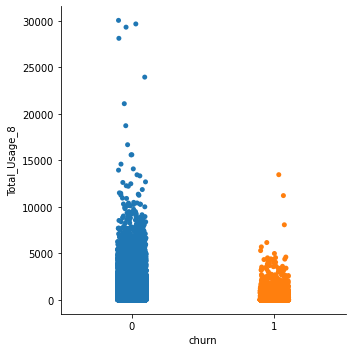

In [225]:
cols = ["Total_Usage_6", "Total_Usage_7", "Total_Usage_8"]
for i in cols:
  sns.catplot(x = "churn", y = i, data = hv_cust)
  plt.show()

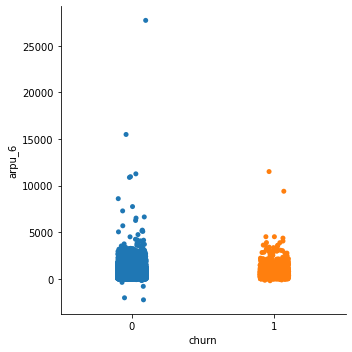

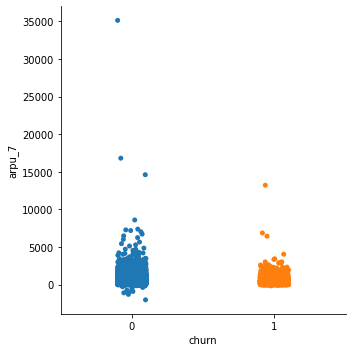

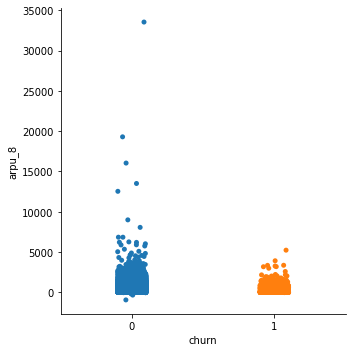

In [226]:
arpu_list=hv_cust.columns[hv_cust.columns.str.contains('arpu')]
for i in arpu_list:
    sns.catplot(x="churn",y=i, data=hv_cust)

In [227]:
# Outlier Treatment

hv_cust.describe(percentiles = [0.01, 0.1, 0.25, 0.5, 0.75, 0.90, 0.99])

mobile_number  circle_id        arpu_6        arpu_7        arpu_8  \
count   3.001500e+04    30015.0  30015.000000  30015.000000  30015.000000   
mean    7.001216e+09      109.0    576.410674    578.374381    524.580928   
std     6.869097e+05        0.0    448.983873    469.004372    496.017589   
min     7.000000e+09      109.0  -2258.709000  -2014.045000   -945.808000   
1%      7.000027e+09      109.0     15.256020     17.322800      0.000000   
10%     7.000260e+09      109.0    226.983400    232.438200    116.945600   
25%     7.000631e+09      109.0    345.426000    346.731000    266.123500   
50%     7.001220e+09      109.0    490.373000    488.367000    442.864000   
75%     7.001805e+09      109.0    702.041000    699.961000    666.147500   
90%     7.002166e+09      109.0    994.123000    995.473400    981.743200   
99%     7.002386e+09      109.0   1983.061300   1999.324300   1986.832700   
max     7.002411e+09      109.0  27731.088000  35145.834000  33543.624000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  \
count  30015.000000  30015.000000  30015.000000  30015.000000  30015.000000   
mean     276.676884    284.473029    248.583079    394.592995    398.921341   
std      460.517747    482.313249    462.041677    477.318139    492.466877   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
1%         0.000000      0.000000      0.000000      0.000000      0.000000   
10%        4.890000      4.544000      1.340000     31.880000     31.184000   
25%       29.430000     28.210000     20.530000     98.210000     95.410000   
50%      102.480000    100.130000     78.590000    250.740000    246.960000   
75%      319.365000    322.475000    264.280000    506.325000    511.840000   
90%      776.014000    805.330000    691.076000    906.816000    925.390000   
99%     2161.370000   2215.204800   2165.271200   2326.262000   2393.170400   
max     7376.710000   8157.780000  10752.560000   8362.360000   9667.130000   

       offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
count  30015.000000   30015.000000   30015.000000   30015.000000   
mean     352.964618      16.743634      13.024504      12.875042   
std      478.326366      77.950137      75.805077      74.450004   
min        0.000000       0.000000       0.000000       0.000000   
1%         0.000000       0.000000       0.000000       0.000000   
10%       12.984000       0.000000       0.000000       0.000000   
25%       77.085000       0.000000       0.000000       0.000000   
50%      207.640000       0.000000       0.000000       0.000000   
75%      458.045000       0.000000       0.000000       0.000000   
90%      836.980000      30.140000      15.986000      16.830000   
99%     2195.677000     347.218400     284.194200     287.091000   
max    14007.340000    2613.310000    3813.290000    4169.810000   

       roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
count   30015.000000   30015.000000   30015.000000      30015.000000   
mean       27.804815      20.967090      20.534738         89.372110   
std       117.343698      96.965902     105.183373        233.035001   
min         0.000000       0.000000       0.000000          0.000000   
1%          0.000000       0.000000       0.000000          0.000000   
10%         0.000000       0.000000       0.000000          0.410000   
25%         0.000000       0.000000       0.000000          7.085000   
50%         0.000000       0.000000       0.000000         28.280000   
75%         0.000000       0.000000       0.000000         84.165000   
90%        56.402000      35.136000      32.028000        197.498000   
99%       537.494200     442.926600     427.264800       1040.287600   
max      3775.110000    2812.040000    5337.040000       6431.330000   

       loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count      30015.000000      30015.000000      30015.000000      30015.000

In [228]:
hv_cust.drop(["mobile_number","circle_id", "tenure_ranges"], axis=1, inplace=True)

In [229]:
# splitting the dataset for modeling as X and y
y = hv_cust.pop("churn")
X = hv_cust

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size=0.30, random_state=100)

In [230]:
y_train.sum()*100/len(X_train.index)

8.31984769157544

In [231]:
# for treating Data Imbalance We are using SMOTE

smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

In [232]:
X_train.shape

(38524, 132)

In [233]:
(100*y_train.sum()/len(X_train))

50.0

In [234]:
# scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [237]:
# Model Building

# Putting features
features = list(X.columns)
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin/'

In [238]:
from sklearn.tree import DecisionTreeClassifier
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [239]:
# Let's check the evaluation metrics of our default model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred_default = dt_default.predict(X_test)
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      8293
           1       0.34      0.77      0.47       712

    accuracy                           0.86      9005
   macro avg       0.66      0.82      0.69      9005
weighted avg       0.93      0.86      0.89      9005



In [241]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

In [244]:
# Printing confusion matrix and accuracy wit the default parm
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test, y_pred_default))
print((metrics.recall_score(y_test,y_pred_default)))

[[7220 1073]
 [ 166  546]]
0.8624097723486952
0.7668539325842697


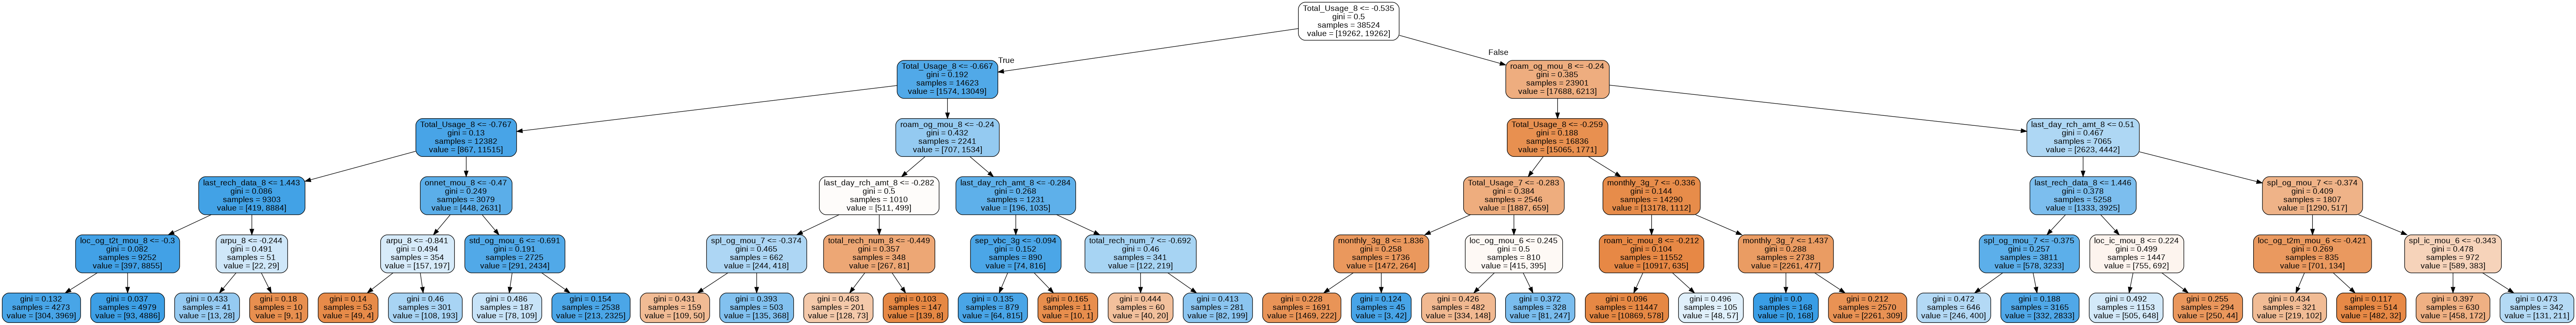

In [245]:
# plotting tree with max_depth=5

dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [246]:
graph.write_pdf("Telecom Churn Default1.pdf")

True

In [247]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
DT = DecisionTreeClassifier()

params = {'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]}
folds = 5

DT_model = GridSearchCV(estimator = DT, cv = folds, param_grid = params, scoring = "accuracy",
                        return_train_score = True, n_jobs = -1)
DT_model.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                     

In [248]:
# printing the optimal accuracy score and hyperparameters
print("Best accuracy ", DT_model.best_score_)
print("Best parm",DT_model.best_params_)
print(DT_model.best_estimator_)

Best accuracy  0.9029698857736241
Best parm {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [251]:
# Testing data in best parameters 
# DT_model_final = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, min_samples_leaf =  50, min_samples_split = 100)

DT_model_final=DT_model.best_estimator_
DT_model_final.fit(X_train,y_train)

y_pred_default = DT_model_final.predict(X_test)

In [252]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))

print(accuracy_score(y_test, y_pred_default))
print(recall_score(y_test,y_pred_default))

[[7490  803]
 [ 228  484]]
0.8855080510827318
0.6797752808988764


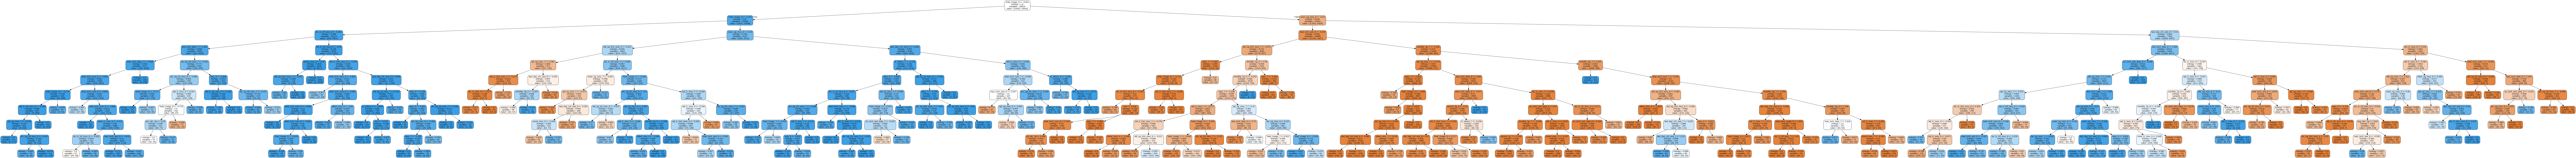

<Figure size 1152x432 with 0 Axes>

In [253]:
plt.figure(figsize=(16,6))
dot_data = StringIO()  
export_graphviz(DT_model_final, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [254]:
# Logistic regression with PCA

from sklearn.decomposition import PCA

pca = PCA(random_state = "42")
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state='42',
    svd_solver='auto', tol=0.0, whiten=False)

In [255]:
pca.explained_variance_ratio_

array([1.00205459e-01, 8.44995519e-02, 6.03127275e-02, 4.70958170e-02,
       3.96766369e-02, 3.48062446e-02, 3.28123765e-02, 3.13880198e-02,
       2.61729910e-02, 2.42161593e-02, 2.31103453e-02, 2.10152615e-02,
       2.01964457e-02, 1.93190268e-02, 1.76548543e-02, 1.69474717e-02,
       1.59460078e-02, 1.47714769e-02, 1.37089842e-02, 1.33380868e-02,
       1.31829291e-02, 1.28456153e-02, 1.23876027e-02, 1.14518147e-02,
       1.09186477e-02, 9.69933433e-03, 9.38901405e-03, 9.18414057e-03,
       9.12808058e-03, 8.66471073e-03, 8.30579571e-03, 8.13575524e-03,
       7.77068929e-03, 7.52709984e-03, 7.18214158e-03, 7.12706470e-03,
       6.97813383e-03, 6.89128572e-03, 6.71311363e-03, 6.45881958e-03,
       6.33998433e-03, 6.32178394e-03, 6.08582839e-03, 5.39728270e-03,
       5.23877992e-03, 4.80552575e-03, 4.68320368e-03, 4.58613376e-03,
       4.50542110e-03, 4.29611435e-03, 4.06824537e-03, 4.04287370e-03,
       3.92231322e-03, 3.90818964e-03, 3.70288189e-03, 3.60988230e-03,
      

No handles with labels found to put in legend.


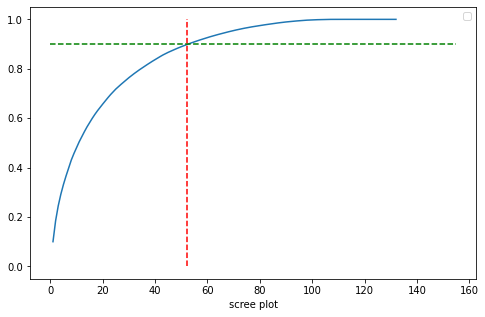

In [256]:
# scree plot to identify the  90% variance ratio
cum = np.cumsum(pca.explained_variance_ratio_)
fig= plt.figure(figsize=(8,5))
plt.plot(range(1,len(cum)+1),cum)
plt.plot([0,155],[0.90,0.90],'g--')
plt.plot([52,52],[0,1.0],'r--')
plt.xlabel('scree plot')
plt.legend()
plt.show()

In [257]:
PCA1 = PCA(n_components = 52, random_state = 42)
PCA1.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=52, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [258]:
pca_x_train = PCA1.fit_transform(X_train)
pca_x_test = PCA1.transform(X_test)

In [259]:
len(pca_x_train)

38524

In [260]:
folds = 5
params = {'C': [0, 0.00001, 0.0001, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 
                0.01,0.0001, 0.001, 0.005, 0.1,0.2 ,0.3 ,0.4, 0.5, 1, 2,3,4,5],
          'penalty' :['l1', 'l2'] }

lr = LogisticRegression()

model = GridSearchCV(estimator = lr, param_grid = params, scoring = "accuracy", cv = folds,return_train_score = True )
model.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0, 1e-05, 0.0001, 0.001, 0.002, 0.003, 0.004,
                               0.005, 0.006, 0.007, 0.01, 0.0001, 0.001, 0.005,
                               0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 4, 5],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Tru

In [261]:
# printing the optimal accuracy score and hyperparameters
print("Best accuracy", model.best_score_)
print("best parm",model.best_params_)
print(model.best_estimator_)

Best accuracy 0.8473938279616411
best parm {'C': 5, 'penalty': 'l2'}
LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [262]:
# Running the model on the Test data 

lr = model.best_estimator_
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred))
print("Accuracy {}".format(metrics.accuracy_score(y_test, y_pred)))
print("Sensitivity {}".format(metrics.recall_score(y_test,y_pred)))

[[6990 1303]
 [ 140  572]]
Accuracy 0.8397556912826207
Sensitivity 0.8033707865168539


In [264]:
## extracting columns and coefficients to merge and identify important variables 
cols = X.columns 
for i in lr.coef_:
    print(i)

[ 1.91030513e-01  4.10366140e-01  3.17011370e-01  1.74326349e+00
  3.47249944e+00  8.91053879e+00  3.86794296e+00  1.52264425e+00
  8.82286013e+00  1.03367089e-01  8.28528325e-02 -9.67774131e-02
 -9.46045024e-01 -3.20396933e-01 -2.33028576e+00 -1.01268405e+00
 -1.75405586e+00 -5.15856866e+00 -2.30110629e+00 -1.25533028e+00
 -5.02980574e+00 -1.63956686e-01 -1.99883943e-01 -3.41821569e-01
 -1.38266152e-01  7.25365209e-02  1.11496642e-01  6.66582071e-01
  8.14107383e-01  1.21271410e+00 -6.78660234e-01 -2.50469094e+00
 -5.10725613e+00 -2.69051126e+00 -4.38515502e-01 -4.75704242e+00
 -3.76479052e-02 -8.12665967e-02 -1.54524710e-01 -1.52251309e+00
 -1.17674179e+00 -4.19420363e+00 -4.29483108e-01 -1.66825368e-01
 -6.95154606e-01 -1.68781622e-02 -4.43225353e-03 -5.40099294e-01
  3.12413577e-03  1.35672277e-02 -4.54770283e+00 -1.41641302e+00
 -1.54071378e+00 -4.18396249e+00 -2.07593152e+00 -1.73662467e+00
 -6.48660425e+00 -3.90808505e-01 -5.24982740e-01 -1.27401697e+00
  3.07393734e+00  3.24701

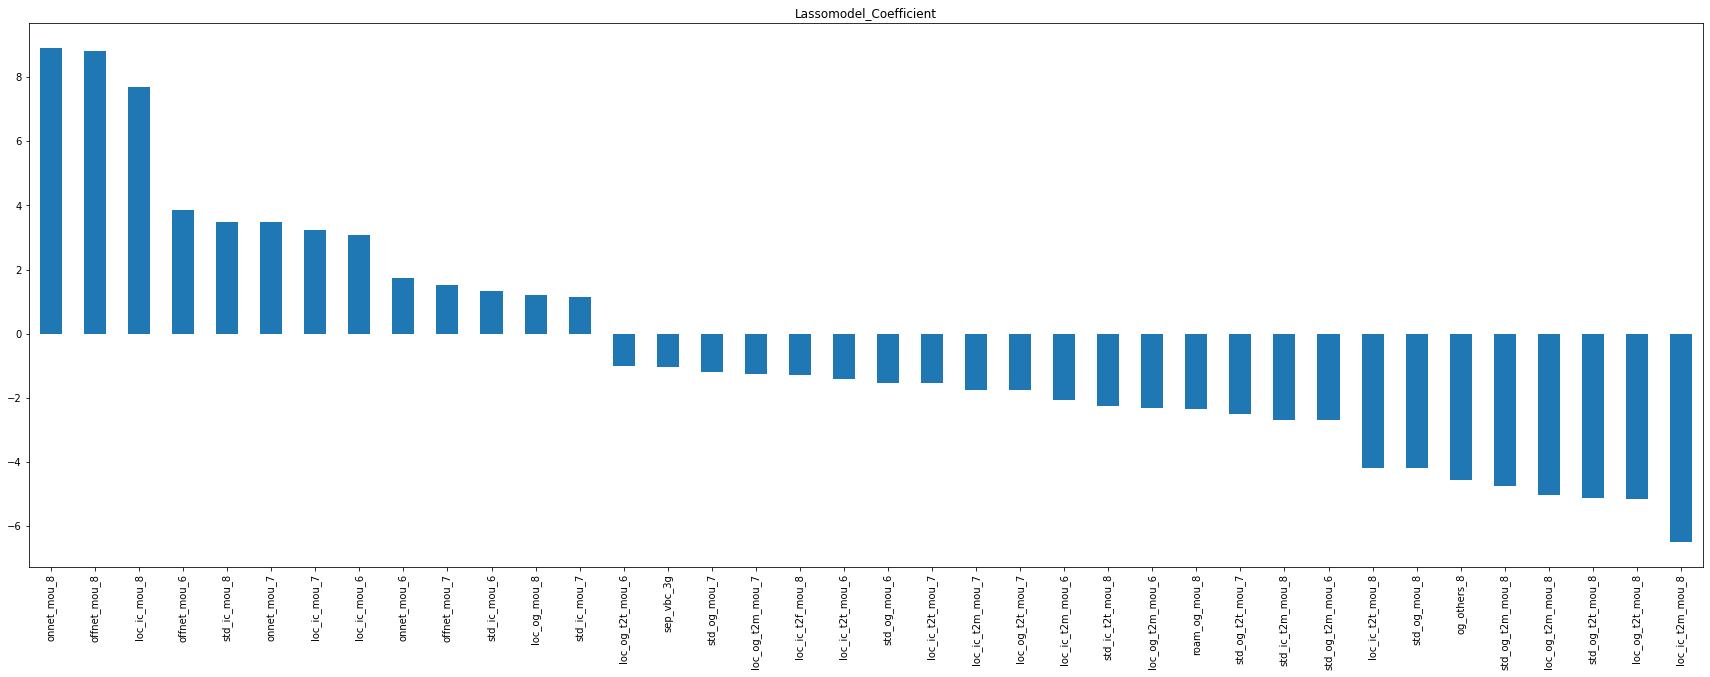

In [266]:
# Plotting most infuential Features 
coef = pd.Series(data = i, index = cols).sort_values(ascending = False)

plt.figure(figsize= (30,10))
coef1=coef[(coef >1) | (coef < -1)]
coef1.plot(kind = "bar",title = "Lassomodel_Coefficient") 
plt.show()

In [267]:

folds = 5
params = {'C': [0, 0.00001, 0.0001, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 
                0.01,0.0001, 0.001, 0.005, 0.1,0.2 ,0.3 ,0.4, 0.5, 1, 2,3,4,5],
          'penalty' :['l1', 'l2'] }

lr = LogisticRegression()

model = GridSearchCV(estimator = lr, param_grid = params, scoring = "accuracy", cv = folds, n_jobs= -1  )
model.fit(pca_x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0, 1e-05, 0.0001, 0.001, 0.002, 0.003, 0.004,
                               0.005, 0.006, 0.007, 0.01, 0.0001, 0.001, 0.005,
                               0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 4, 5],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False

In [268]:
# printing the optimal accuracy score and hyperparameters
print("Best accuracy", model.best_score_)
print("best parm",model.best_params_)
print("Best Model  ",model.best_estimator_)

Best accuracy 0.8311960615451796
best parm {'C': 0.1, 'penalty': 'l2'}
Best Model   LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [269]:
# Building The LR model with the Best Hyperparameters 

pca_lr = model.best_estimator_

pca_lr.fit(pca_x_train, y_train)


y_pred = pca_lr.predict(pca_x_test)

In [270]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred))

print("Accuracy {}".format(metrics.accuracy_score(y_test, y_pred)))
print("Sensitivity {}".format(metrics.recall_score(y_test,y_pred)))

[[6747 1546]
 [ 136  576]]
Accuracy 0.8132148806218767
Sensitivity 0.8089887640449438


# Random Forest Classifier

In [275]:
# # Random Forest Classifier with PCA

# params = {'max_depth': [4,8,10],
#     'n_estimators': [100,200, 300]}
# folds = 5
# RF = RandomForestClassifier()

# RF_model = GridSearchCV(estimator = RF, param_grid= params, cv = folds, return_train_score  = True, scoring = "accuracy", n_jobs = -1)
# RF_model.fit(pca_x_train,y_train)

rf_model = RandomForestClassifier()
rf_model.fit(pca_x_train, y_train)

# Make predictions
prediction_test = rf_model.predict(pca_x_test)
print ('Randon Forest Accuracy with Default Hyperparameter',metrics.accuracy_score(y_test, prediction_test))

Randon Forest Accuracy with Default Hyperparameter 0.9113825652415325


In [277]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,prediction_test))

print("Accuracy {}".format(metrics.accuracy_score(y_test, prediction_test)))
print("Sensitivity {}".format(metrics.recall_score(y_test,prediction_test))) 

[[7837  456]
 [ 342  370]]
Accuracy 0.9113825652415325
Sensitivity 0.5196629213483146


In [278]:
# ## We are using Gridserach CV to check accuracy accross below combination and we will be building  our final model on the best found parm
# ## we will be checking performance on maxdept 4 8 and 10 and estimators of 100 , 200 & 300 

# params = {'max_depth': [4,8,10],
#     'n_estimators': [100,200, 300]}
# folds = 5
# RF = RandomForestClassifier()

# RF_model = GridSearchCV(estimator = RF, param_grid= params, cv = folds, return_train_score  = True, scoring = "accuracy", n_jobs = -1)
# RF_model.fit(pca_x_train,y_train)

KeyboardInterrupt: ignored

In [279]:
# XGBoost With PCA
## Building with Random Parameters to check the performance 
boost = XGBClassifier(max_depth=5,n_estimators=600,learning_rate=0.2)
boost.fit(pca_x_train, y_train)
y_pred_a = boost.predict(pca_x_test)

KeyboardInterrupt: ignored

In [ ]:
# # Printing confusion matrix and accuracy with the XGB default parameters 

# print(confusion_matrix(y_test,y_pred_a))

# print("Accuracy {}".format(metrics.accuracy_score(y_test,y_pred_a)))
# print("Sensitivity {}".format(metrics.recall_score(y_test,y_pred_a)))

In [280]:
# ## We will use Grid Search CV to find the best combination of hyperparameters 
# # hyperparameter tuning with XGBoost
# # creating a KFold object 
# folds = 3
# # specify range of hyperparameters
# param_grid = {'learning_rate': [0.2, 0.6], 
#               'subsample': [0.3, 0.6, 0.9],
#               'max_depth': [4,6,8],
#               'n_estimators': [100,200, 300]}
                       
# # specify model
# xgb_model = XGBClassifier()
# # set up GridSearchCV()
# model_xgbc = GridSearchCV(estimator = xgb_model, 
#                         param_grid = param_grid, 
#                         scoring= 'accuracy', 
#                         cv = folds, 
#                         verbose = 1,
#                         return_train_score=True)  
# # fit the model
# model_xgbc.fit(pca_x_train,y_train)


In [281]:
# # printing the optimal accuracy score and hyperparameters
# print("Best accuracy", model_xgbc.best_score_)
# print("Best parm",model_xgbc.best_params_)
# print(model_xgbc.best_estimator_)

In [282]:
# # chosen hyperparameters
# # 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
# params = {'learning_rate': 0.2,
#           'max_depth': 8, 
#           'n_estimators':300,
#           'subsample': 0.9,
#           'n_jobs':1
#          }

# # fit model on training data
# model = XGBClassifier(params = params)
# model.fit(pca_x_train, y_train)

In [283]:
# # predict
# y_pred_xg = model.predict(pca_x_test)

In [284]:
# # Printing confusion matrix and accuracy with the XGB default parameters 

# print(confusion_matrix(y_test,y_pred_xg))

# print("accuracy {}".format(metrics.accuracy_score(y_test, y_pred_xg)))
# print("sensitivity {}".format(metrics.recall_score(y_test,y_pred_xg)))